In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

C:\Users\kumar\AppData\Local\Temp\ipykernel_25412\47278016.py:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25412\47278016.py:25: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25412\47278016.py:32: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25412\47278016.py:39: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25412\47278016.py:46: FutureWarning:



`shade` is now depre

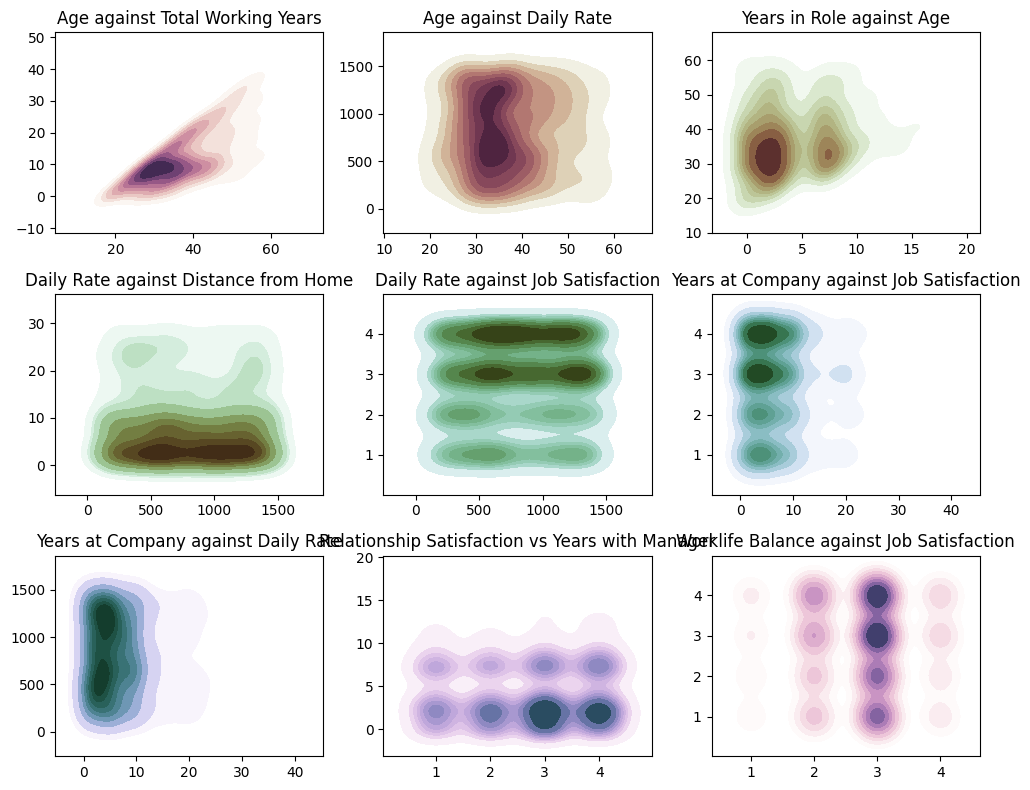

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
attrition = pd.read_csv('Employee-Attrition.csv')

# Create the subplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Defining colormap
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Plot 1: Age against TotalWorkingYears
x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, cut=5, ax=axes[0, 0])
axes[0, 0].set(title='Age against Total Working Years')

# Plot 2: Age against DailyRate
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0, 1])
axes[0, 1].set(title='Age against Daily Rate')

# Plot 3: YearsInCurrentRole against Age
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
x = attrition['YearsInCurrentRole'].values
y = attrition['Age'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[0, 2])
axes[0, 2].set(title='Years in Role against Age')

# Plot 4: DailyRate against DistanceFromHome
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[1, 0])
axes[1, 0].set(title='Daily Rate against Distance from Home')

# Plot 5: DailyRate against JobSatisfaction
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[1, 1])
axes[1, 1].set(title='Daily Rate against Job Satisfaction')

# Plot 6: YearsAtCompany against JobSatisfaction
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[1, 2])
axes[1, 2].set(title='Years at Company against Job Satisfaction')

# Plot 7: YearsAtCompany against DailyRate
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[2, 0])
axes[2, 0].set(title='Years at Company against Daily Rate')

# Plot 8: RelationshipSatisfaction against YearsWithCurrManager
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[2, 1])
axes[2, 1].set(title='Relationship Satisfaction vs Years with Manager')

# Plot 9: WorkLifeBalance against JobSatisfaction
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x=x, y=y, cmap=cmap, shade=True, ax=axes[2, 2])
axes[2, 2].set(title='Worklife Balance against Job Satisfaction')

# Adjust layout
f.tight_layout()

plt.show()


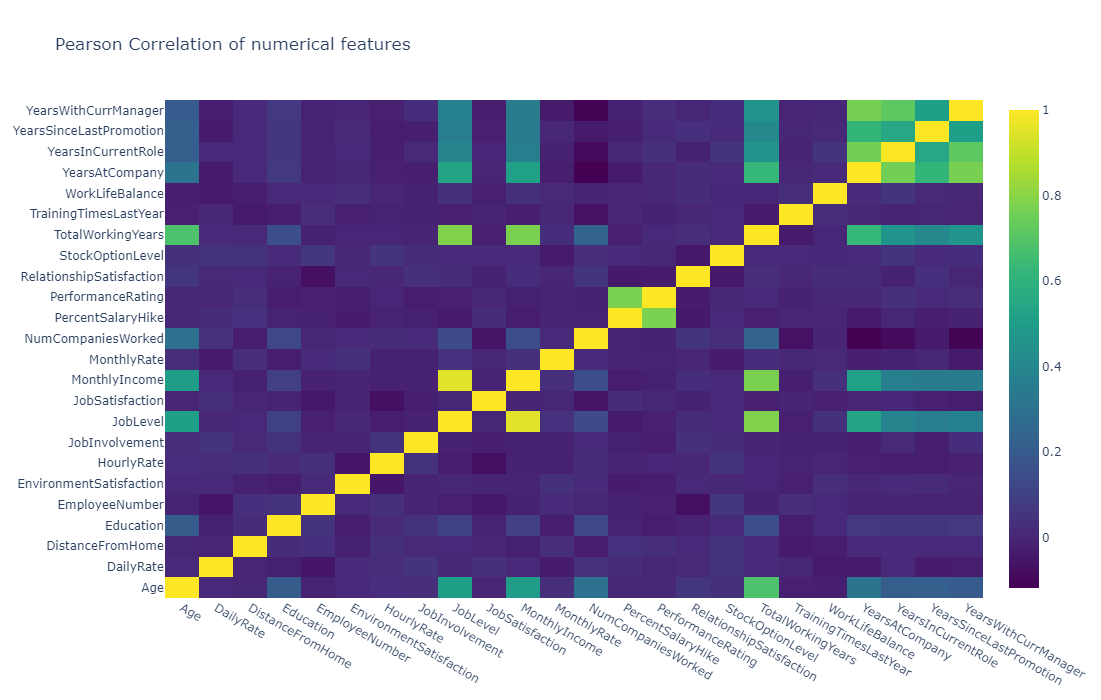

In [8]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [10]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

KeyError: "['Attrition'] not found in axis"

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
attrition = pd.read_csv('Employee-Attrition.csv')

# Drop 'Attrition_numerical' column if it exists
if 'Attrition_numerical' in attrition.columns:
    attrition = attrition.drop(['Attrition_numerical'], axis=1)
else:
    print("'Attrition_numerical' column not found. Skipping drop operation.")

# Identify categorical and numerical columns
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list
numerical = attrition.columns.difference(categorical)

# Creating a DataFrame with only categorical columns
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1)  # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)  # Converting categorical columns to dummy variables

# Creating a DataFrame with only numerical columns
attrition_num = attrition[numerical]

# Concatenating numerical and categorical DataFrames
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

# Mapping target values to numerical values
target_map = {'Yes': 1, 'No': 0}
target = attrition["Attrition"].apply(lambda x: target_map[x])

# Split data into train and test sets
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size=0.80,
                                                         random_state=0)

# Applying SMOTE to handle class imbalance in the training set
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train, target_train)

# Set random seed for reproducibility
seed = 0

# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 'sqrt',
    'max_depth': 4,
    'min_samples_leaf': 2,
    'random_state': seed,
    'verbose': 0
}

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

# Predicting on the test set
rf_predictions = rf.predict(test)

# Print accuracy and classification report
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))


'Attrition_numerical' column not found. Skipping drop operation.


AttributeError: 'DataFrame' object has no attribute 'iteritems'

C:\Users\kumar\AppData\Local\Temp\ipykernel_25128\721028733.py:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25128\721028733.py:27: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kumar\AppData\Local\Temp\ipykernel_25128\721028733.py:30: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




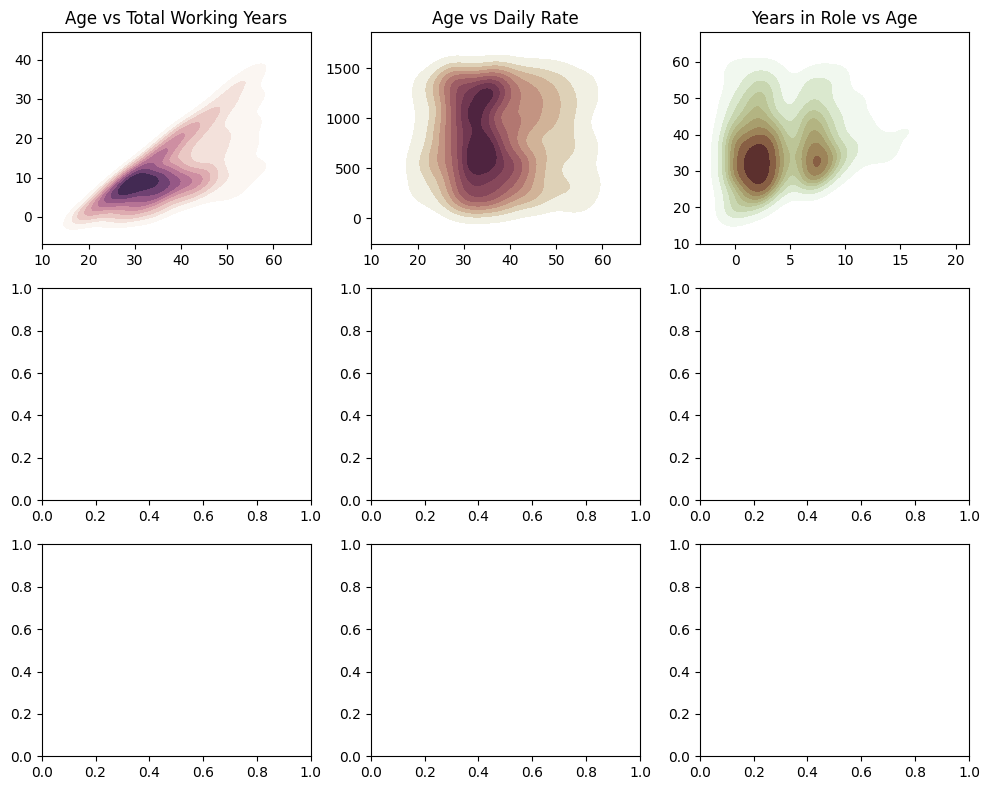

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py

# Initialize Plotly for offline mode
py.init_notebook_mode(connected=True)

# Load dataset
attrition = pd.read_csv('Employee-Attrition.csv')

# Exploratory Data Analysis (EDA) using Seaborn's kdeplot
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Colormap scheme
cmap1 = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
cmap2 = sns.cubehelix_palette(start=0.333, light=1, as_cmap=True)
cmap3 = sns.cubehelix_palette(start=0.666, light=1, as_cmap=True)

# Generate kdeplots
sns.kdeplot(x=attrition['Age'].values, y=attrition['TotalWorkingYears'].values, cmap=cmap1, shade=True, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Total Working Years')

sns.kdeplot(x=attrition['Age'].values, y=attrition['DailyRate'].values, cmap=cmap2, shade=True, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Daily Rate')

sns.kdeplot(x=attrition['YearsInCurrentRole'].values, y=attrition['Age'].values, cmap=cmap3, shade=True, ax=axes[0, 2])
axes[0, 2].set_title('Years in Role vs Age')

# Additional plots (if needed) can be added below
# Example:
# sns.kdeplot(x=attrition['Column1'], y=attrition['Column2'], cmap=cmap, shade=True, ax=axes[1, 0])
# axes[1, 0].set_title('Column1 vs Column2')

# Adjust layout
f.tight_layout()

# Show plot
plt.show()

In [13]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [15]:
# Import necessary libraries
import plotly.graph_objs as go
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming RandomForestClassifier has been trained (from Script 3)

# Load dataset
attrition_final = pd.read_csv('preprocessed_attrition.csv')

# Visualize Feature Importance
trace = go.Scatter(
    y=rf.feature_importances_,
    x=attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=attrition_final.columns.values
)

data = [trace]
layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    xaxis=dict(ticklen=5, showgrid=False, zeroline=False, showline=False),
    yaxis=dict(title='Feature Importance', showgrid=False, zeroline=False, ticklen=5, gridwidth=2),
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


NameError: name 'rf' is not defined

In [16]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
attrition_final = pd.read_csv('preprocessed_attrition.csv')

# Assuming 'Attrition' is the target variable
X = attrition_final.drop('Attrition', axis=1)
y = attrition_final['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Now you can access the feature importances


import plotly.graph_objs as go

# Visualize Feature Importance
trace = go.Scatter(
    y=rf.feature_importances_,
    x=attrition_final.columns.values[:-1],  # Exclude target variable from column names
    mode='markers',
    marker=dict(
        sizemode='diameter',
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=attrition_final.columns.values[:-1]
)

data = [trace]
layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    plot_bgcolor='rgb(243, 243, 243)',
    paper_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=data, layout=layout)
fig.show()


ValueError: could not convert string to float: 'Travel_Rarely'

In [17]:
# Import necessary modules
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

# Load dataset
attrition_final = pd.read_csv('preprocessed_attrition.csv')

# Assuming 'Attrition' is the target variable
X = attrition_final.drop('Attrition', axis=1)
y = attrition_final['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Visualize Feature Importance
trace = go.Scatter(
    y=rf.feature_importances_,
    x=X.columns,  # Use the feature names (excluding target variable)
    mode='markers',
    marker=dict(
        sizemode='diameter',
        size=13,
        color=rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text=X.columns  # Display feature names on hover
)

data = [trace]
layout = go.Layout(
    autosize=True,
    title='Random Forest Feature Importance',
    hovermode='closest',
    plot_bgcolor='rgb(243, 243, 243)',
    paper_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

# Generate and display the plot
fig = go.Figure(data=data, layout=layout)
fig.show()


ValueError: could not convert string to float: 'Travel_Rarely'